In [5]:
import pandas as pd
file = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file)
purchase_data.head()


,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [25]:
players = len(purchase_data["SN"].value_counts())
numberofplayers = [{"Total Number of Players": players}]
numberofplayers_df = pd.DataFrame(numberofplayers)
numberofplayers_df

,Total Number of Players
0,576


In [7]:
unique_items = len(purchase_data["Item Name"].unique())
average_price = purchase_data["Price"].mean()
total_revenue = purchase_data["Price"].sum()
total_purchase_analysis = [{"Unique Items": unique_items, "Average Price": f'${round(average_price,2)}', "Total Revenue": f'${round(total_revenue,2)}'}]
total_purchase_analysis_df = pd.DataFrame(total_purchase_analysis)
total_purchase_analysis_df

,Unique Items,Average Price,Total Revenue
0,179,$3.05,$2379.77


In [8]:
male = purchase_data["Gender"].value_counts()["Male"]
female = purchase_data["Gender"].value_counts()["Female"]
other = purchase_data["Gender"].value_counts()["Other / Non-Disclosed"]
total_gender_counts = male + female + other
total_gender_counts
# Percentage and Count of Male Players
male_percent = f'{round(male/total_gender_counts,3) * 100} %'
#Percentage and Count of Female Players
female_percent = f'{round(female/total_gender_counts,4) * 100} %'
other_percent = f'{round(other/total_gender_counts,4) * 100} %'
gender_demographics = {"Gender":["Male", "Female", "Other/Non-Disclosed"],
                       "Total Percentage": [male_percent, female_percent, other_percent],
                       "Total Count":[male, female, other]}
gender_demographics_df = pd.DataFrame(gender_demographics)
gender_df = gender_demographics_df.set_index("Gender")
gender_df


,Total Percentage,Total Count
Gender,,
Male,83.6 %,652
Female,14.49 %,113
Other/Non-Disclosed,1.92 %,15


In [9]:
# Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender
gender_group = purchase_data.groupby(['Gender'])
# Using the gender groupby object calculate purchase count, avg. purchase price, avg purchase total 
gender_analysis_df = pd.DataFrame({"Purchase Count":gender_group['Purchase ID'].count(),
                                   "Average Purchase Price":gender_group['Price'].mean(),
                                   "Total Purchase Value":gender_group['Price'].sum()})
# Format the cells by using a map() method 
gender_analysis_df['Average Purchase Price'] = gender_analysis_df['Average Purchase Price'].map("${:.2f}".format)
gender_analysis_df['Total Purchase Value'] = gender_analysis_df['Total Purchase Value'].map("${:.2f}".format)

#gender_analysis_df
#Calculate the Avg Total Purchase per Person by a groupby on both the Gender and SN columns, summing the Price column
# then put it into a dataframe and groupby the Gender and take the mean of the summed Price column for each unique player
gender_person_group = purchase_data.groupby(['Gender','SN']).sum()
gender_person_sum_df = pd.DataFrame(gender_person_group)


# Next add this column to the above dataframe
gender_analysis_df['Avg Total Purchase per Person'] = gender_person_sum_df.groupby('Gender')['Price'].mean()
# format the new column
gender_analysis_df['Avg Total Purchase per Person'] = gender_analysis_df['Avg Total Purchase per Person'].map("${:.2f}".format)
gender_analysis_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,$1967.64,$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


In [10]:
# Create the bins in which Data will be held   
bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]
# Create the names for the four bins
group_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39","40+"]

# First create dataframe for unique list of ages - one for each SN value
uniq_SN_group = purchase_data.groupby(['SN'])
uniq_age_df = pd.DataFrame(uniq_SN_group['Age'].max())


# Next use the unique list of ages along with the bins and group names to bin the ages

uniq_age_df["Age Bins"] = pd.cut(uniq_age_df["Age"], bins, labels=group_names)

#Change the index to be the Age Bins labels instead of the default index
uniq_age_df.set_index('Age Bins',inplace=True)

# Now count how many values are in each bin by using groupby on the Age Bins labels and
# Assign this result to a new dataframe
age_bins_df = pd.DataFrame(uniq_age_df.groupby(['Age Bins']).count())

# Rename the column to Total Count instead of the Age
age_bins_df.rename(columns = {'Age':'Total Count'}, inplace = True) 

# Calculate the percentage of total players each Age Bin represents and add it to the dataframe
age_bins_df['Percentage of Players'] = age_bins_df['Total Count'] / players *100

# Format the cells using map() to be 2 decimal places and have a % at the end of the value
age_bins_df['Percentage of Players'] = age_bins_df['Percentage of Players'].map("{:.2f}%".format)
age_bins_df

,Total Count,Percentage of Players
Age Bins,,
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


In [11]:
# Bin the purchase_data dataframe by age using the previous bins and labels from above
purchase_data["Age Bins"] = pd.cut(purchase_data["Age"], bins, labels=group_names)
# Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc
age_group = purchase_data.groupby(['Age Bins'])
purch_count = age_group['Purchase ID'].count()
avg_purch_price = age_group['Price'].mean()
total_purch = age_group['Price'].sum()

# Create a summary dataframe to hold the results 
age_purch_df = pd.DataFrame({"Purchase Count":purch_count,"Average Purchase Price":avg_purch_price,\
                            "Total Purchase Value":total_purch})

#Calculate the Avg Total Purchase per Person by a groupby on both the Age Bins and SN columns, summing the Price column
# then put it into a dataframe and groupby the Age Bins and take the mean of the summed Price column for each unique player
age_person_group = purchase_data.groupby(['Age Bins','SN']).sum()
age_person_sum_df = pd.DataFrame(age_person_group)

# Next add this column to the above dataframe
age_purch_df['Avg Total Purchase per Person'] = age_person_sum_df.groupby('Age Bins')['Price'].mean()
# Finally format the new columns
age_purch_df['Average Purchase Price'] = age_purch_df['Average Purchase Price'].map("${:.2f}".format)
age_purch_df['Total Purchase Value'] = age_purch_df['Total Purchase Value'].map("${:.2f}".format)
age_purch_df['Avg Total Purchase per Person'] = age_purch_df['Avg Total Purchase per Person'].map("${:.2f}".format)
age_purch_df

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Bins,,,,
<10,23,$3.35,$77.13,$0.13
10-14,28,$2.96,$82.78,$0.14
15-19,136,$3.04,$412.89,$0.72
20-24,365,$3.05,$1114.06,$1.93
25-29,101,$2.90,$293.00,$0.51
30-34,73,$2.93,$214.00,$0.37
35-39,41,$3.60,$147.67,$0.26
40+,13,$2.94,$38.24,$0.07


In [12]:
# Group by SN to get information by each unique username
top_spend_group = purchase_data.groupby(['SN'])

# Sum the spending by each user and sort in descending order to find the top 5 spenders then put into a dataframe
top_spend_df = pd.DataFrame(top_spend_group.sum().sort_values('Price',ascending=False))

# Take the SN index values from the first 5 rows of data and put into a list 
#to later use as a mask to get all data for just these top spender users
spenders_df = top_spend_df.index.values[0:5]
#top5_spenders_SN
# Get all rows from purchase_data where the SN is in the spenders
spenders_df = purchase_data[purchase_data['SN'].isin(spenders_df)]

# Group the spenders_df by SN
top_group = spenders_df.groupby(['SN'])

# Do basic calculations on the group for Purchase Count,Average Purchase Price and Total Purchase Value
purch_count = top_group['Purchase ID'].count()
avg_purch = top_group['Price'].mean()
total_purch = top_group['Price'].sum()

# Create a summary dataframe and add the basic calculations
purch_summary_df = pd.DataFrame({"Purchase Count":purch_count,"Average Purchase Price":avg_purch, "Total Purchase Value":total_purch})

# Format the cells to 2 decimal places with $ signs at the beginning of the values
purch_summary_df['Average Purchase Price'] = purch_summary_df['Average Purchase Price'].map("${:.2f}".format)
purch_summary_df['Total Purchase Value'] = purch_summary_df['Total Purchase Value'].map("${:.2f}".format)

# Finally sort the values on the Total Purchase Value column in descending order
purch_summary_df.sort_values('Total Purchase Value',ascending=False)

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


In [13]:
# Retrieve the Item ID, Item Name, and Item Price columns from the purchase_data dataframe
item_df = purchase_data.loc[:,["Item ID","Item Name","Price"]]
#item_df.head()
#Group by Item ID and Item Name
item_group = item_df.groupby(['Item ID','Item Name'])

# Count the number of values in Price column grouped by Item ID 
# then sort in descending order to determine the most popular items then put into a dataframe
pop_df = pd.DataFrame(item_group.count().sort_values('Price',ascending=False))
# Take the Item ID index values from the first 5 rows of data and put into a list  
# to later use as a mask to get all data for just these top 5 most popular Item ID
popular = pop_df.index.values[0:5]
popular_ItemID_list = [i[0] for i in popular]

# Get all rows from item_df where the Item ID is in the top5_popular_ItemID_list 
popular_df = item_df[item_df['Item ID'].isin(popular_ItemID_list)]

# Group the top5_popular_df by Item ID and Item Name
popular_group = popular_df.groupby(['Item ID','Item Name'])

# Do basic calculations on the group for Purchase Count,Item Price and Total Purchase Value
pop_count = popular_group['Price'].count()
pop_price = popular_group['Price'].max()
pop_total = popular_group['Price'].sum()

# Create a summary dataframe and add the basic calculations
pop_summary_df = pd.DataFrame({"Purchase Count":pop_count,"Item Price":pop_price,
                                     "Total Purchase Value":pop_total})

# Format the cells to 2 decimal places with $ signs at the beginning of the values
pop_summary_df['Item Price'] = pop_summary_df['Item Price'].map("${:.2f}".format)
pop_summary_df['Total Purchase Value'] = pop_summary_df['Total Purchase Value'].map("${:.2f}".format)

# Finally sort the values on the Total Purchase Value column in descending order
pop_summary_df.sort_values('Purchase Count',ascending=False)

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
145,Fiery Glass Crusader,9,$4.58,$41.22
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


In [14]:
# Count the number of values in Price column grouped by Item ID 
# then sort in descending order to determine the most popular items then put into a dataframe
top_profit_df = pd.DataFrame(item_group.sum().sort_values('Price',ascending=False))
#top_profit_df.head(5)
# Take the Item ID index values from the first 5 rows of data and put into a list  
# to later use as a mask to get all data for just these top 5 most popular Item ID
profit = top_profit_df.index.values[0:5]
profit_ItemID_list = [i[0] for i in profit]
#top5_profit_ItemID_list

# Get all rows from item_df where the Item ID is in the top5_profit_ItemID_list 
profit_df = item_df[item_df['Item ID'].isin(profit_ItemID_list)]

# Group the top5_popular_df by Item ID and Item Name
profit_group = profit_df.groupby(['Item ID','Item Name'])

# Do basic calculations on the group for Purchase Count,Item Price and Total Purchase Value
profit_count = profit_group['Price'].count()
profit_price = profit_group['Price'].max()
profit_total = profit_group['Price'].sum()
# Create a summary dataframe and add the basic calculations
profit_summary_df = pd.DataFrame({"Purchase Count":profit_count,"Item Price":profit_price,
                                     "Total Purchase Value":profit_total})

# Format the cells to 2 decimal places with $ signs at the beginning of the values
profit_summary_df['Item Price'] = profit_summary_df['Item Price'].map("${:.2f}".format)
profit_summary_df['Total Purchase Value'] = profit_summary_df['Total Purchase Value'].map("${:.2f}".format)

# Finally sort the values on the Total Purchase Value column in descending order
profit_summary_df.sort_values('Total Purchase Value',ascending=False)

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80


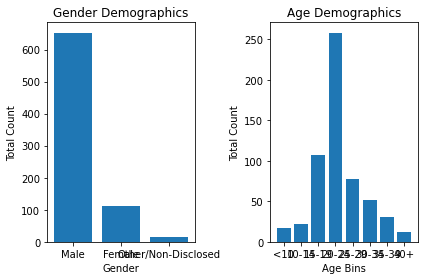

In [23]:

import matplotlib.pyplot as plt

# plot 1
plt.subplot(1, 2, 1)
plt.bar(gender_df.index, gender_df["Total Count"])
plt.xlabel("Gender")
plt.ylabel("Total Count")
plt.title("Gender Demographics")

# plot 2
plt.subplot(1, 2, 2)
plt.bar(age_bins_df.index, age_bins_df["Total Count"])
plt.xlabel("Age Bins")
plt.ylabel("Total Count")
plt.title("Age Demographics")

plt.tight_layout()
plt.show()


In [ ]:
#Hipoteza koju mozemo da izvedemo jeste da najvise trose osobe od 20-24 godine.